In [43]:
import os
import cPickle as pickle
import numpy as np
import glob
import matplotlib.pyplot as plt

import sys
sys.path.append("../../MyPythonModule")
from LDA_kai import LDA
sys.path.append("../../Interactive_Graph_Visualizer/networkx-master")
import networkx as nx

In [44]:
G_file = "../Data/Search_iPhone_10_add_childs_append/K10_myexttext_largest/nx_datas/G_with_params_comp4_2.gpkl"
lda_file = "../Data/Search_iPhone_10_add_childs_append/K10_myexttext_largest/instance.pkl"
with open(G_file,"r") as fi:
    G = pickle.load(fi)
with open(lda_file,"r") as fi:
    lda = pickle.load(fi)

G.node[2]

{'a_score': 0.00017401832689457823,
 'color': '#EB6100',
 'from_hosts': {u'time-space.kddi.com': 3, u'tobuy.jp': 1, u'www.kddi.com': 1},
 'h_score': 6.79129919615872e-08,
 'to_hosts': {u'onlineshop.au.com': 1,
  u'star.auone.jp': 1,
  u'time-space.kddi.com': 5,
  u'wowma.jp': 1,
  u'www.kddi.com': 7},
 'topic': 0}

In [45]:
lda.theta().shape

(254, 10)

In [46]:
def collect_adjacents(G,node_no,link_type):
    ret_list = []
    if link_type == "in":
        for edge in G.in_edges(node_no):
            ret_list.append(edge[0])
    elif link_type == "out":
        for edge in G.out_edges(node_no):
            ret_list.append(edge[1])
    return ret_list

In [47]:
collect_adjacents(G,tgt_node,"in")

[23, 41, 47, 45, 49]

In [48]:
collect_adjacents(G,tgt_node,"out")

[38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53]

In [49]:
def topic_summarizer(lda,targets):
    file_id_dict_inv = {v:k for k, v in lda.file_id_dict.items()}#ファイル名とLDAでの文書番号(逆引き)．LDAの方に作っとけばよかった．．．
    sum_topics = np.zeros(lda.K,dtype=np.float32)
    thetas = lda.theta()

    for i,file_no in enumerate(targets):
        lda_id = file_id_dict_inv[file_no]
        sum_topics += thetas[lda_id]

    return sum_topics

In [50]:
topic_summarizer(lda,collect_adjacents(G,tgt_node,"in"))

array([  9.59805697e-02,   4.72933017e-02,   9.66046751e-02,
         9.46385086e-01,   2.73436368e-01,   3.95321786e-01,
         3.34634602e-01,   1.27389371e+00,   1.53642106e+00,
         2.88388383e-05], dtype=float32)

In [54]:
def get_adjecents_topics(G,lda,node_no,link_type):
    node_list = collect_adjacents(G,node_no,link_type)
    return topic_summarizer(lda,node_list)

In [55]:
def make_topic_ratio_graph(theta,title="topics"):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    labels = [unicode(x+1) for x in range(len(theta))]
    plt.rcParams['font.size']=20.0
    ax.pie(theta,colors=COLORLIST[:len(theta)],labels=labels,startangle=90,radius=0.2, center=(0.5, 0.5), frame=True,counterclock=False)
    ax.axis("off")
    ax.axis('equal')
    fig.canvas.set_window_title(title)
    #ax.set_title(title)
    fig.set_facecolor('w')
    #plt.savefig(os.path.join(exp_dir,"Topic"+unicode(lda.K)+"_share_pie.png"))

In [60]:
COLORLIST_R = [r"#EB6100",r"#F39800",r"#FCC800",r"#FFF100",r"#CFDB00",r"#8FC31F",r"#22AC38",r"#009944",r"#009B6B",r"#009E96",r"#00A0C1",r"#00A0E9",r"#0086D1",r"#0068B7",r"#00479D",r"#1D2088",r"#601986",r"#920783",r"#BE0081",r"#E4007F",r"#E5006A",r"#E5004F",r"#E60033"]
COLORLIST = [c for c in COLORLIST_R[::2]]#色のステップ調整

In [61]:
tgt_node = 2

In [62]:
parent_topics = get_adjecents_topics(G,lda,tgt_node,"in")
parent_topics

array([  9.59805697e-02,   4.72933017e-02,   9.66046751e-02,
         9.46385086e-01,   2.73436368e-01,   3.95321786e-01,
         3.34634602e-01,   1.27389371e+00,   1.53642106e+00,
         2.88388383e-05], dtype=float32)

In [63]:
child_topics = get_adjecents_topics(G,lda,tgt_node,"out")
child_topics

array([ 0.72512645,  0.66694838,  0.19917828,  2.75923324,  0.60234141,
        0.83342141,  4.41810894,  2.91333914,  1.77802444,  0.10427851], dtype=float32)

In [67]:
make_topic_ratio_graph(parent_topics,title="parents")

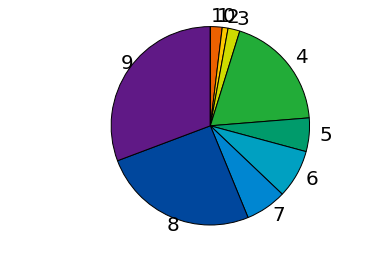

In [68]:
plt.show()

In [69]:
make_topic_ratio_graph(child_topics,title="childlen")

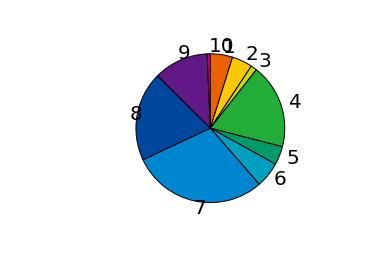

In [70]:
plt.show()